# Function: Flux on Detector

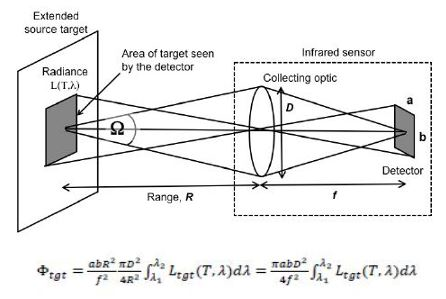

### Fully Resolved Target - source fills FOV (Eqn 5.19)
###   
###   Input Parameters:
####   (enter photons/sec-cm^2-str or watts/cm^2-str and use corresponding output units)

In [1]:
#Flux on Detector   Version 20    18-Oct-2022
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import widgets, Layout, interact
#from ipywidgets import interactive, fixed, interact_manual

#import matplotlib.image as mpimg
#img = mpimg.imread('Fig5-11.png')
#imgplot = plt.imshow(img)
#plt.axis('off') 

#constants
pi = np.pi
#90 points f/1 to f/10
numpts = 90

  
def plot_func(Lsb,f,D,p,t):
    
        #validate inputs
        skip = False        
        if Lsb <= 0:
            skip = True
        elif f<= 0:
            skip = True
        elif D <=0: 
            skip = True
        elif p <=0:
            skip = True
        elif t <=0:
            skip = True
        elif t >1:
            skip = True
        else:
            skip = False

        if skip == True:
            print ('Invalid Inputs')
            
        else:
            fns = np.arange(1,10,9/numpts,dtype=float)
            Fluxes = []
            fn = f/D

            #compute flux on detector from textbook eqn 5.19
            Flux = (t*(Lsb)*(pi)*((p*1e-04)**2)*((D*.01)**2))/(4*(f*0.01)**2)  #(L is cm^2, p is um, f/D are both M and cancel anyway)

            #do a sweep of f/# for comparison
            i=0
            while i < numpts:
                Fluxes.append(t*(Lsb*1e+04)*(pi/4)*(p*1e-06/fns[i])**2)
                #print (i," f/# ",fns[i],Lsb,p,D,f,'   Flux:',Fluxes[i])
                i+=1

            Fluxd =  "{:.4e}".format(Flux)
            fnd = "{:.2f}".format(fn)

            CalcResults = widgets.HTML(value = "<p style='font-size:14pt'><b>Calculated Results:</b>")
            display(CalcResults) #Displays calculated results message
            
            print('Flux on Detector = {:8.6e}'.format(Flux),'Photons/sec (or Watts depending on input) at f/#  {:.4f}'.format(fn))
                            
            #line plot with centerline result
            #plt.style.use('dark_background')
            
            
            def slider_func(FNO): 
                
                FNOi = int(FNO*10 -10)
                if FNOi == 90 :
                    FNOi = 89
                Fluxesd = "{:.4e}".format(Fluxes[FNOi])
                #create line for plot
                vlinex = np.repeat(FNO, 5)
                vliney = vlinex*3 #random
                count=0
                for i in vlinex:
                    vliney[count] = ((count)/3)*max(Fluxes)
                    #print (vlinex, vliney)
                    count+=1
                
                plt.style.use('classic')
                fig=plt.figure(figsize=(12,6))
                ax = fig.add_subplot(1, 1, 1)
                plt.grid(True)
                
                ax.plot(fns, Fluxes,color='red')
                plt.plot (vlinex,vliney,'--',color='purple',linewidth=1.5)
                plt.plot(FNO,Fluxes[FNOi],'v',color='purple')
                plt.text(FNO, 1.05*Fluxes[FNOi], " " + str(Fluxesd) + " ph/sec",color='purple')
                plt.text(FNO, -0.1*max(Fluxes), " f/#" + str(FNO),color='purple')
                vlinex = np.repeat(fn, 5)
                #plt.plot (vlinex,vliney,'--',color='blue',linewidth=1.5)

                plt.plot(fn,Flux,'v',color='blue')
                plt.xlabel('Focal Ratio')
                plt.ylabel('Flux on Detector - Photons/sec')
                plt.title('Flux vs F/#')
                #plt.xlim(0,max(fns))
                plt.ylim(0,1.1*max(Fluxes))
                plt.xlim(0,10)
                plt.text(fn, 1.05*Flux, " " + str(Fluxd) + " ph/sec",color='blue')
                plt.text(fn, -0.1*max(Fluxes), " f/#" + str(fnd),color='blue')

                #major_xticks = np.arange(0, 10, 1)
                #minor_xticks = np.arange(0, 10, 0.1)
                #ax.set_xticks(major_xticks)
                #ax.set_xticks(minor_xticks, minor=True)
                #major_yticks = np.arange(0, max(Fluxes), max(Fluxes)/11)
                #ax.set_yticks(major_yticks)

            
            interact(slider_func, FNO = widgets.FloatSlider(value=7, min=1, max=10, step=0.25,description = ' f/# (unitless)',layout=Layout(width="750px"),continuous_update=True))

# Description width style
style1 = {'description_width': 'initial'} 
    
interact(plot_func, 
             Lsb = widgets.FloatText(value=2.6e15, step=1e6,description = 'Radiance (Photon or Watt units):',readout_format='.2f',style=style1),             
             f = widgets.FloatText(value=0.40, step=0.05, description = 'Focal Lenght (m):',style=style1),
             D = widgets.FloatText(value=0.20, step=0.05, description = 'Aperture (m):',style=style1),
             p = widgets.FloatText(value=20, description = 'Detector pitch (um):',style=style1),
             t = widgets.FloatText(value=0.85, description = 'Optics Transmission (unitless):',style=style1),
             )
    


interactive(children=(FloatText(value=2600000000000000.0, description='Radiance (Photon or Watt units):', step…

<function __main__.plot_func(Lsb, f, D, p, t)>